<a href="https://colab.research.google.com/github/ROKR7381/DEMO_PURPOSE/blob/main/Credit_card__fraud__detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings('ignore')

In [31]:
credit_card = pd.read_csv('creditcard.csv')
credit_card.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [32]:
credit_card.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
262128,160327.0,2.037162,-0.544407,-0.748423,0.071857,-0.157840,0.497687,-0.786396,0.177549,1.110700,...,0.123548,0.545898,-0.017484,-1.329426,-0.132294,0.633877,-0.025494,-0.070548,11.50,0
208956,137346.0,2.020188,-1.641576,-1.253405,-1.701395,-0.420456,0.968017,-1.096166,0.144253,-1.453286,...,-0.028267,0.398309,0.258204,-0.325860,-0.356691,-0.106435,0.049867,-0.039414,97.74,0
3368,2912.0,1.357077,-0.193785,-0.517350,-1.246472,-0.037901,-0.524172,-0.046283,-0.034692,1.075581,...,0.000773,0.053417,-0.282324,-0.853258,0.880898,-0.541363,0.025465,-0.007292,1.00,0
268810,163390.0,-0.214754,0.965134,0.081771,-0.826705,0.611384,-0.654817,0.867902,-0.030511,-0.096152,...,-0.261249,-0.536492,0.019389,-0.344368,-0.425110,0.145334,0.352952,0.143366,0.99,0
70489,53888.0,1.281120,-0.577976,0.640332,-0.768576,-0.999888,-0.354724,-0.720369,0.084789,-1.022822,...,0.001682,-0.149659,0.167250,0.208051,0.093428,-0.481443,0.020354,0.013129,21.44,0
185349,126630.0,-1.288759,0.554301,0.604584,-0.142320,1.928540,4.554059,-0.882154,1.778642,-0.289489,...,0.097129,0.084994,-0.152629,0.668942,0.446344,-0.413842,0.267271,0.045224,45.00,0
255264,157140.0,1.424396,-0.486129,0.053369,3.740406,0.349930,2.686239,-0.762368,0.767514,-0.193957,...,-0.060797,-0.218147,0.254159,-1.685430,-0.682514,-0.207626,0.050029,-0.026522,152.10,0
54976,46714.0,1.193753,0.607571,-0.393131,1.310882,0.185698,-0.796884,0.169169,-0.052336,0.050717,...,-0.051145,-0.086253,-0.082540,-0.085595,0.585813,-0.294474,0.045455,0.052028,1.00,0
88772,62284.0,-2.074349,-2.253113,1.220184,-0.159201,-0.023512,-0.919730,0.507808,-0.064307,-1.630092,...,0.599455,0.681858,0.799055,0.406085,0.718253,0.067194,-0.118269,0.114941,377.00,0
137462,82169.0,-1.518164,0.037711,1.524448,-1.019883,-0.192653,0.361231,-0.268780,0.808887,0.624729,...,-0.112642,-0.396444,-0.018661,-0.713482,-0.008147,0.876403,0.142046,0.008392,68.83,0


0    284315
1       492
Name: Class, dtype: int64


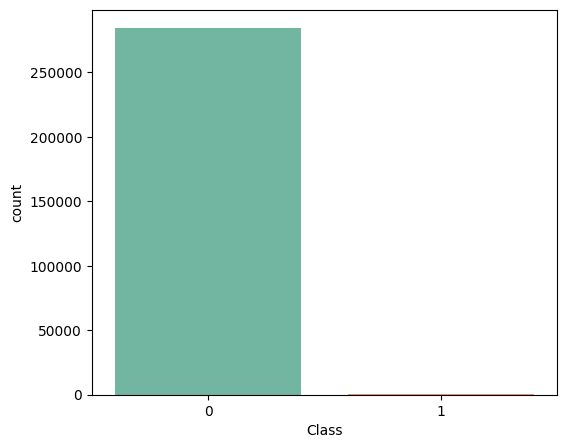

In [59]:
print(credit_card['Class'].value_counts())
plt.figure(figsize=(6,5),dpi=100)
sns.countplot(data=credit_card,x='Class',palette='Set2');

In [34]:
print(credit_card.shape)

(284807, 31)


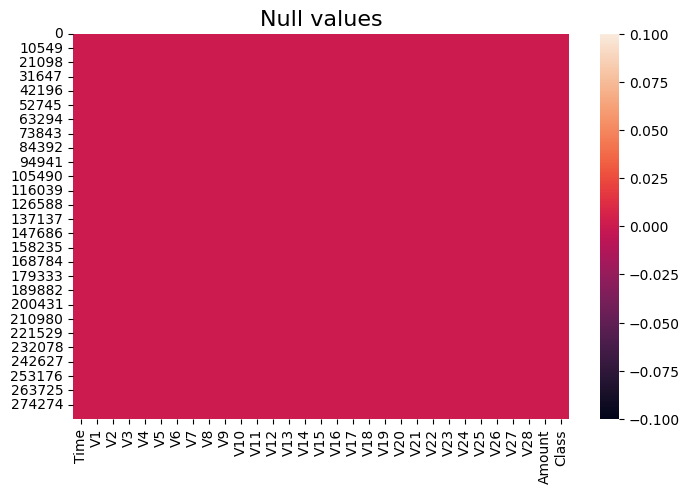

In [35]:
plt.figure(figsize=(8,5))
plt.title('Null values',fontsize=16)
sns.heatmap(credit_card.isnull());

In [46]:
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [36]:
credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [37]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [38]:
credit_card.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

EXPLORATORY DATA ANALYSIS

In [39]:
features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']

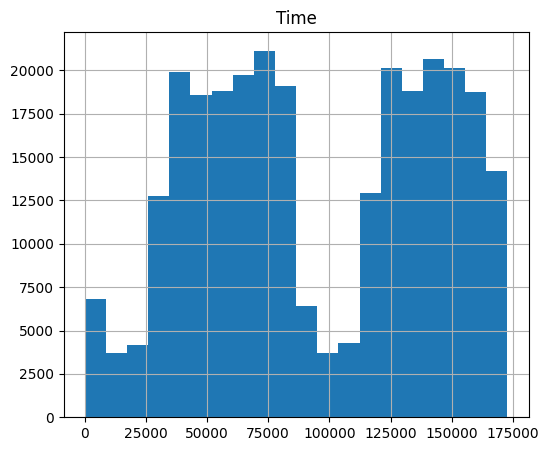

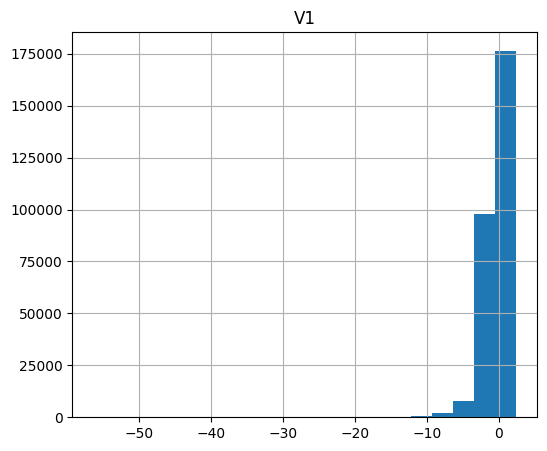

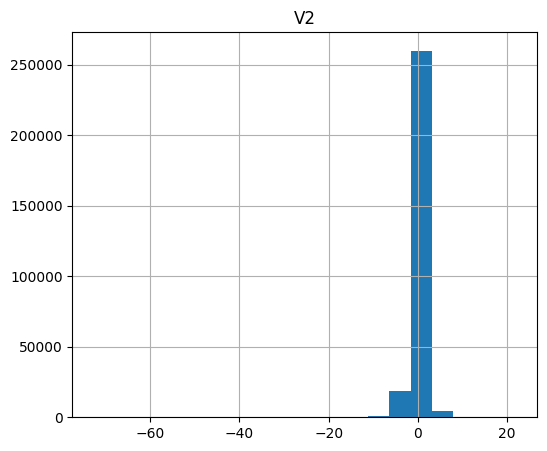

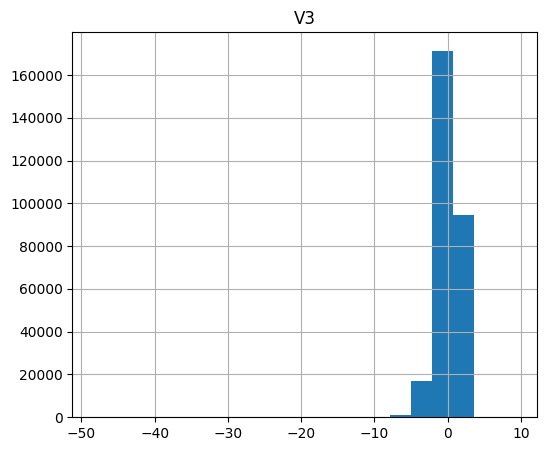

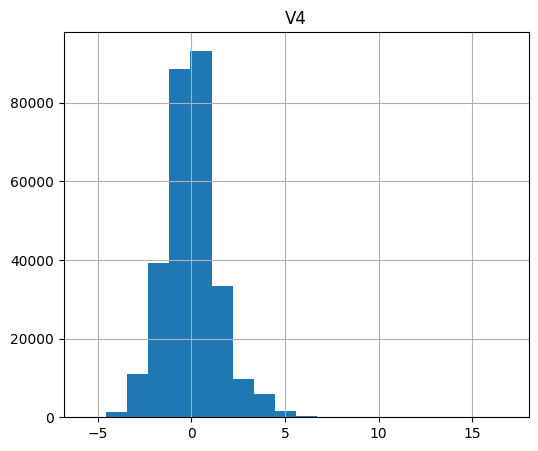

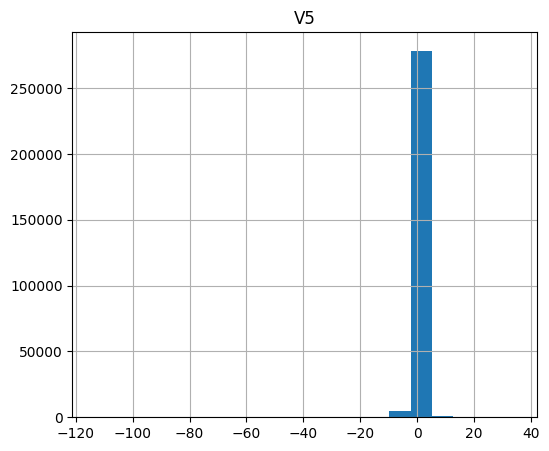

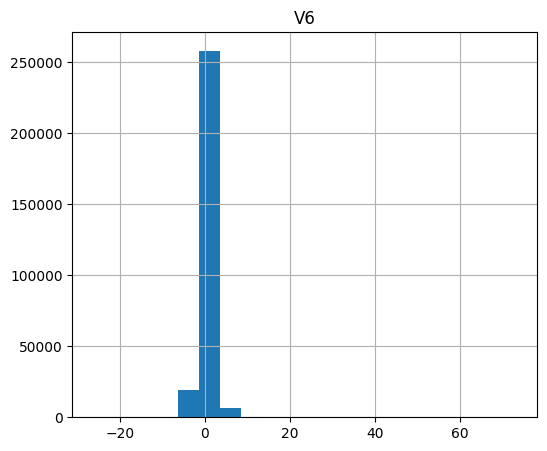

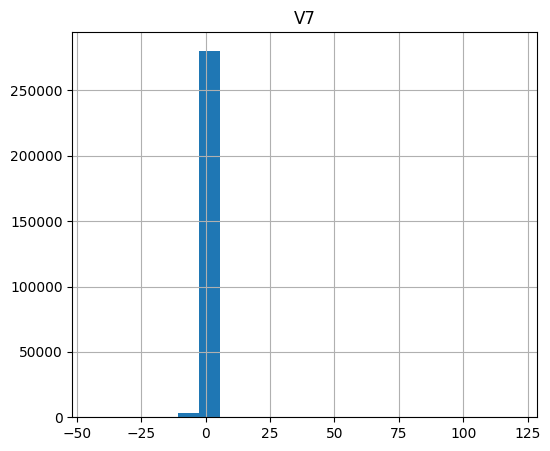

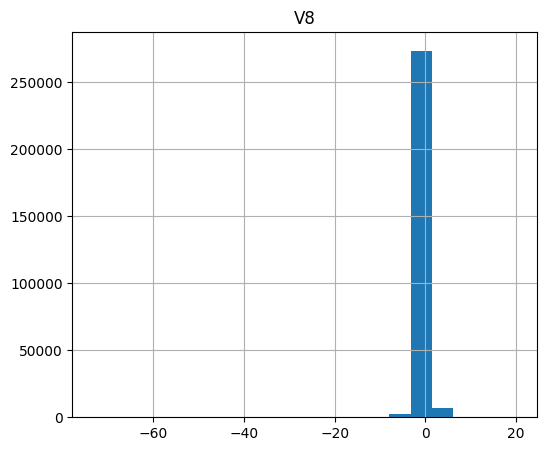

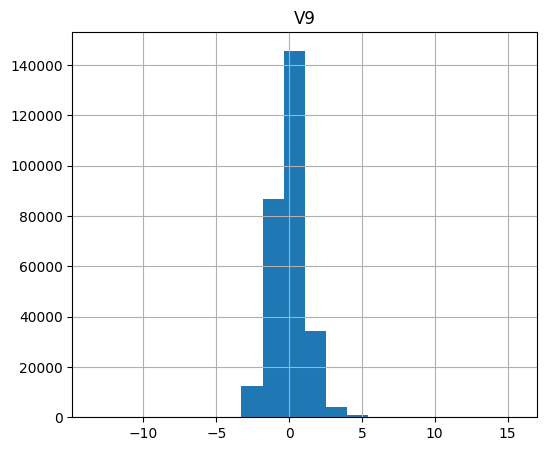

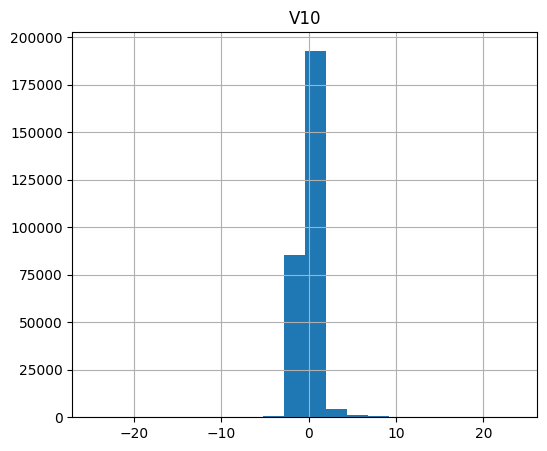

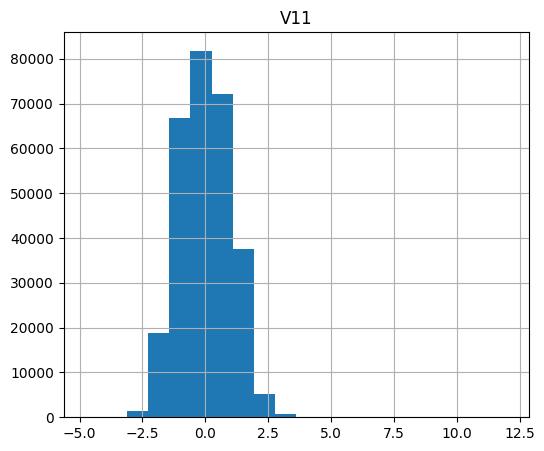

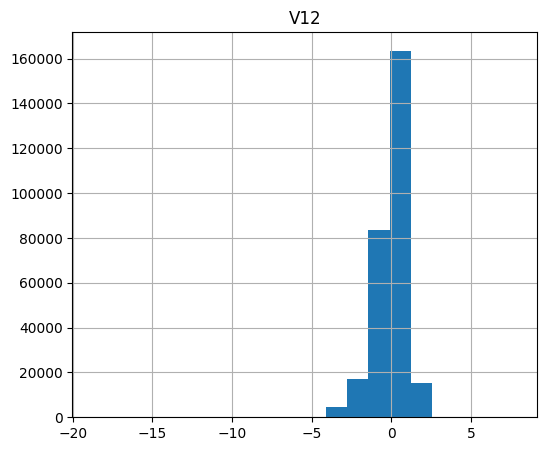

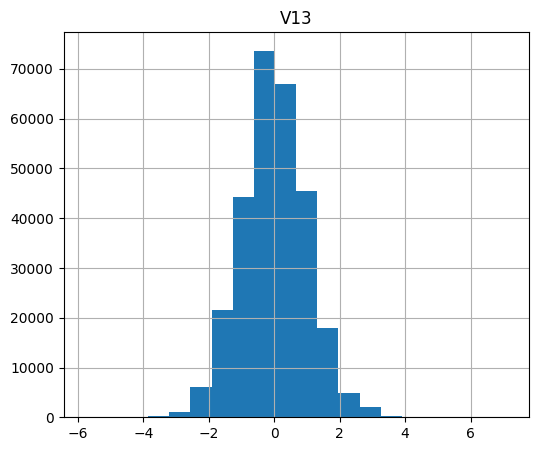

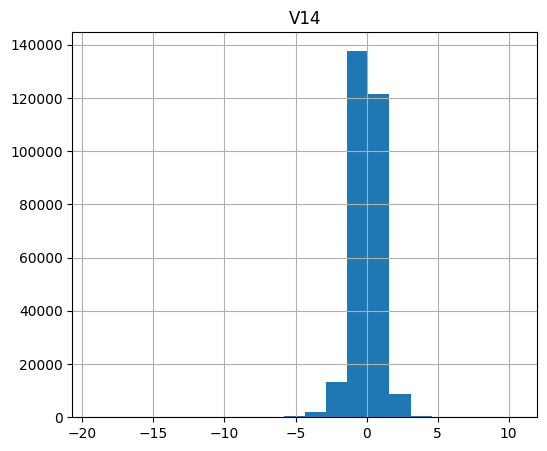

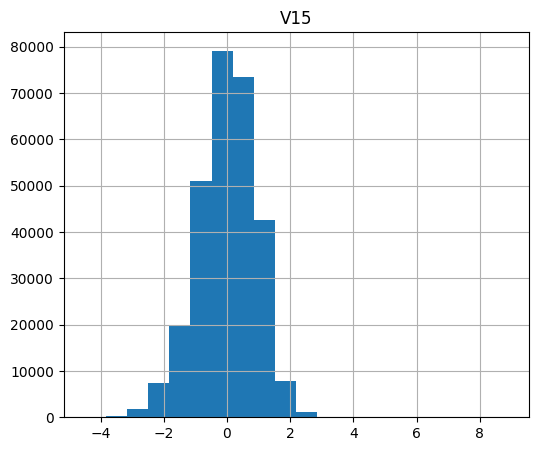

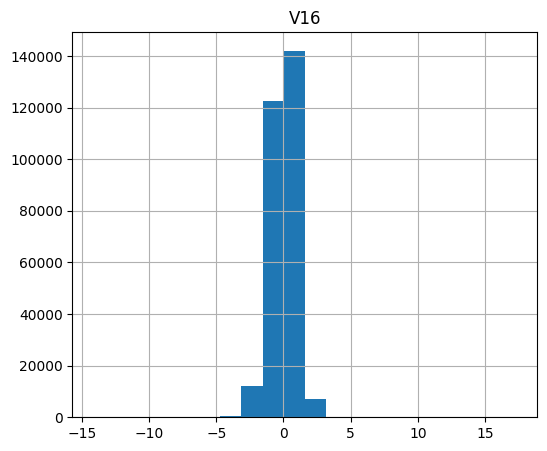

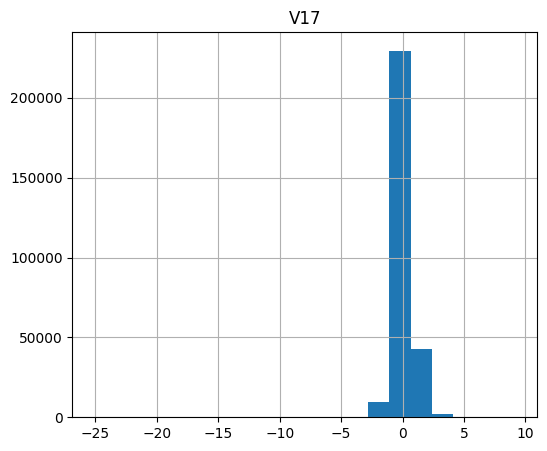

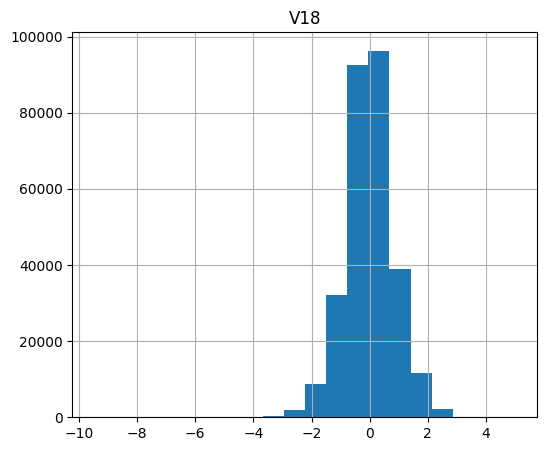

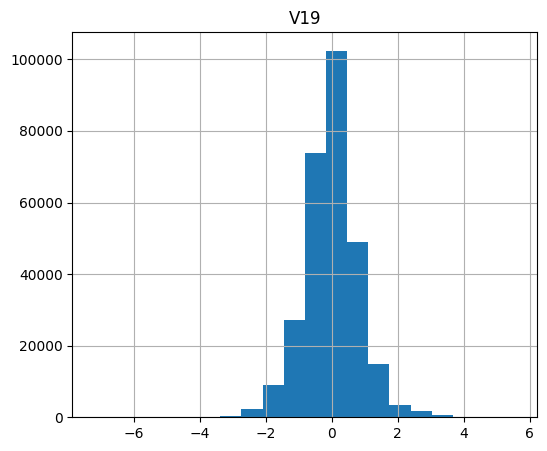

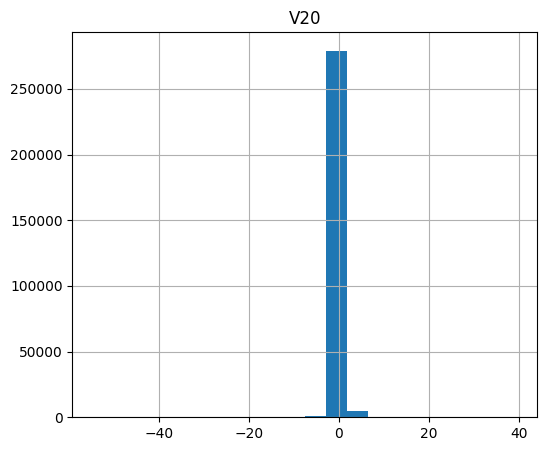

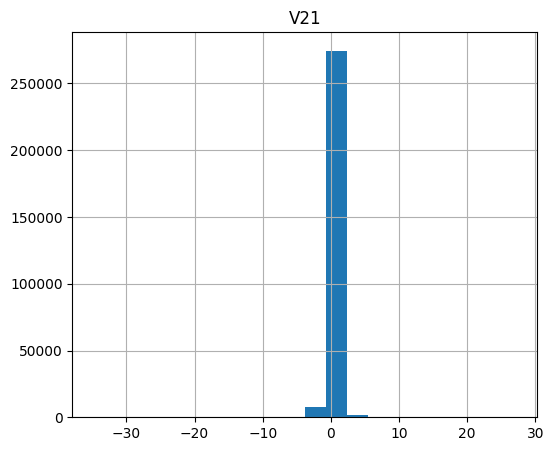

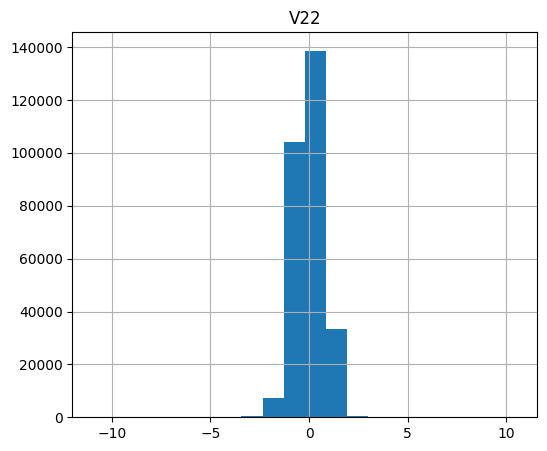

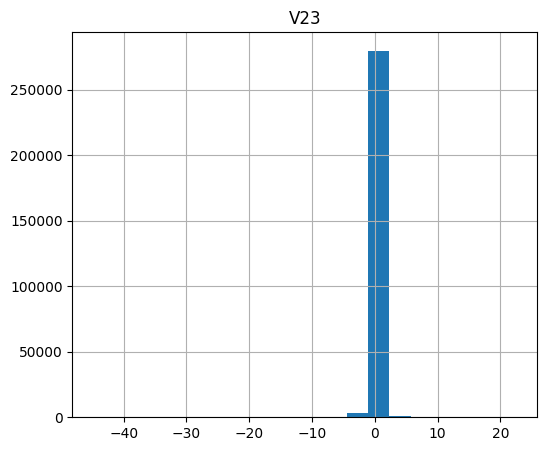

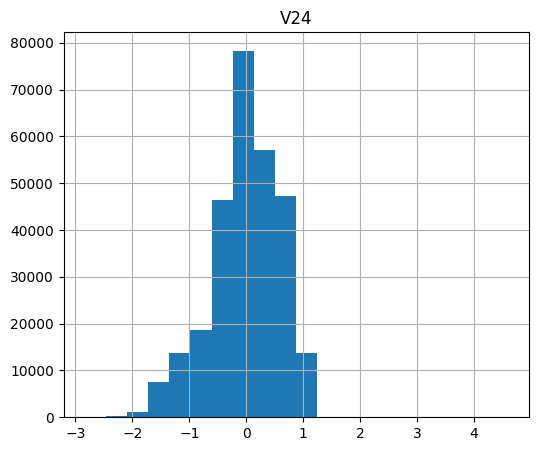

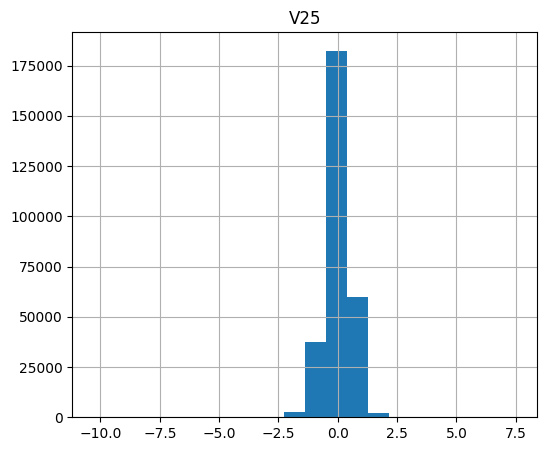

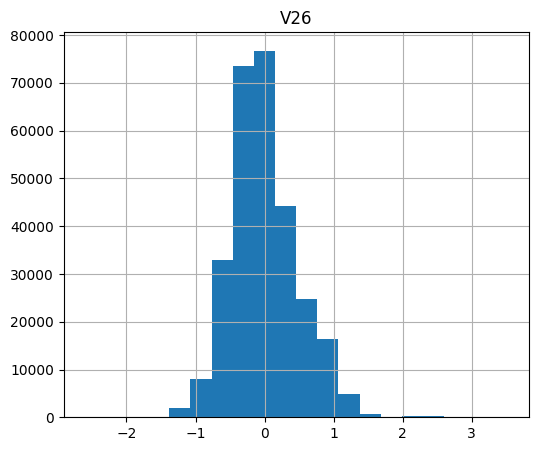

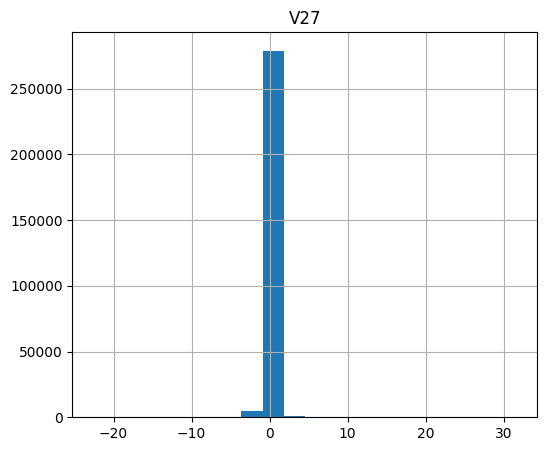

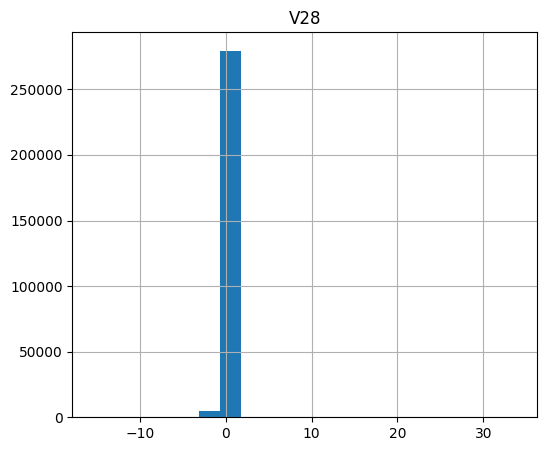

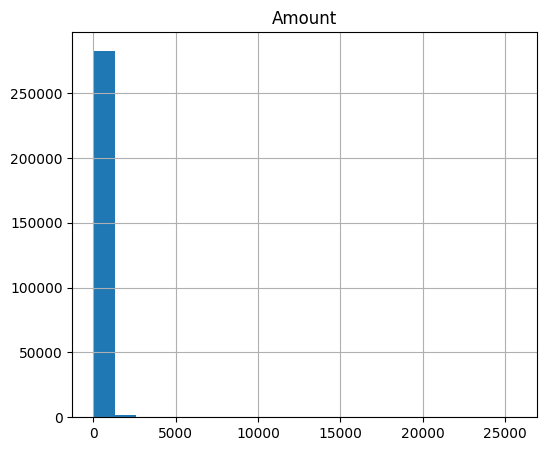

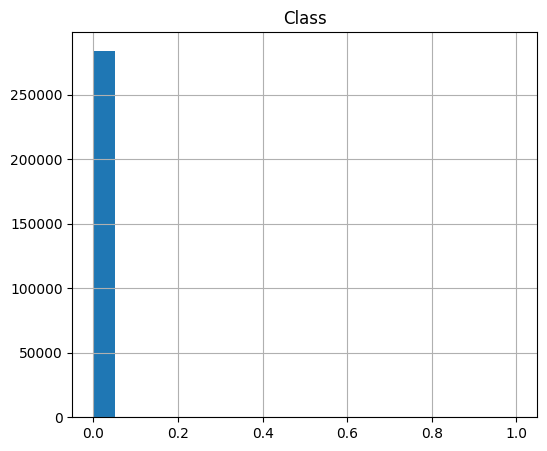

In [41]:
for num in features:
    plt.figure(figsize=(6,5),dpi = 100)
    credit_card[num].hist(bins=20)
    plt.title(num)
    plt.show()

In [42]:
credit_card.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<Axes: >

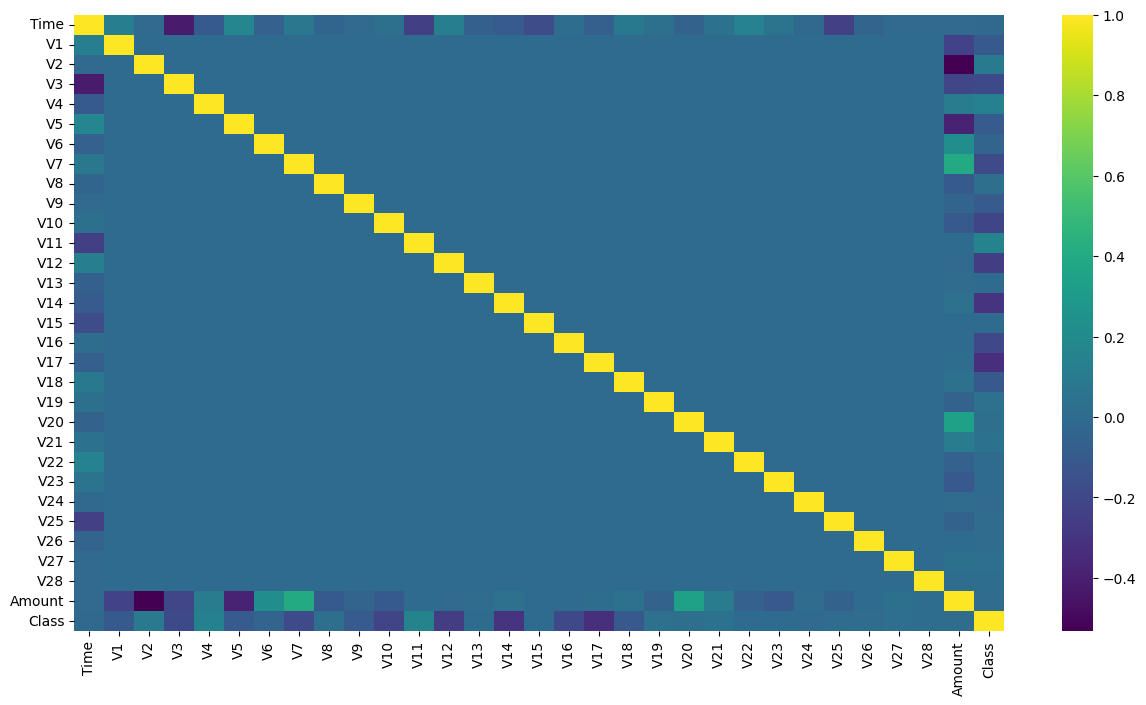

In [50]:
plt.figure(figsize = (15,8),dpi=100)
sns.heatmap(credit_card.corr(),annot=False,cmap='viridis')

In [53]:
df = PowerTransformer(method='yeo-johnson', standardize=True)
credit_card['Amount'] = df.fit_transform(credit_card['Amount'].values.reshape(-1, 1))

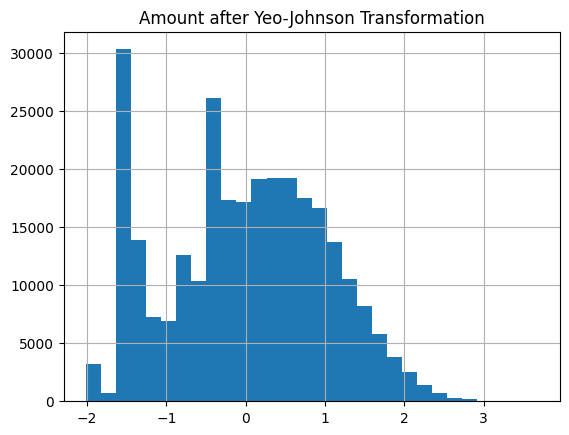

In [55]:
credit_card['Amount'].hist(bins=30)
plt.title('Amount after Yeo-Johnson Transformation')
plt.show()

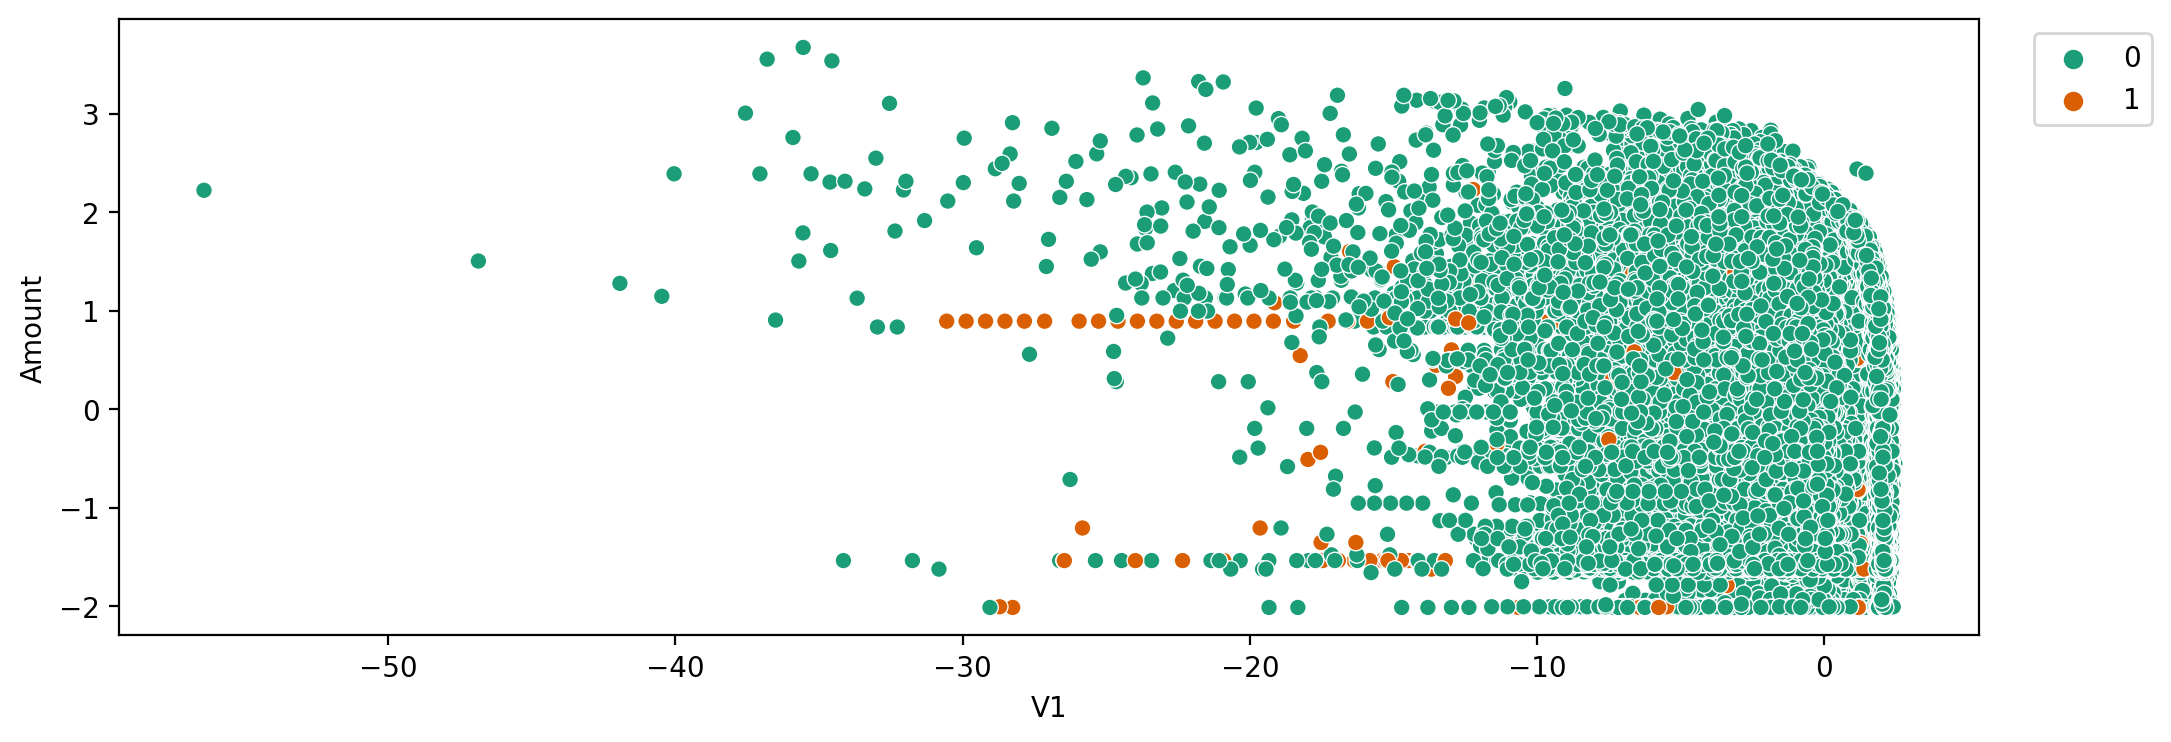

In [60]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(x='V1',y='Amount',data=credit_card,hue='Class', palette='Dark2')
plt.legend(bbox_to_anchor=(1.1,1));

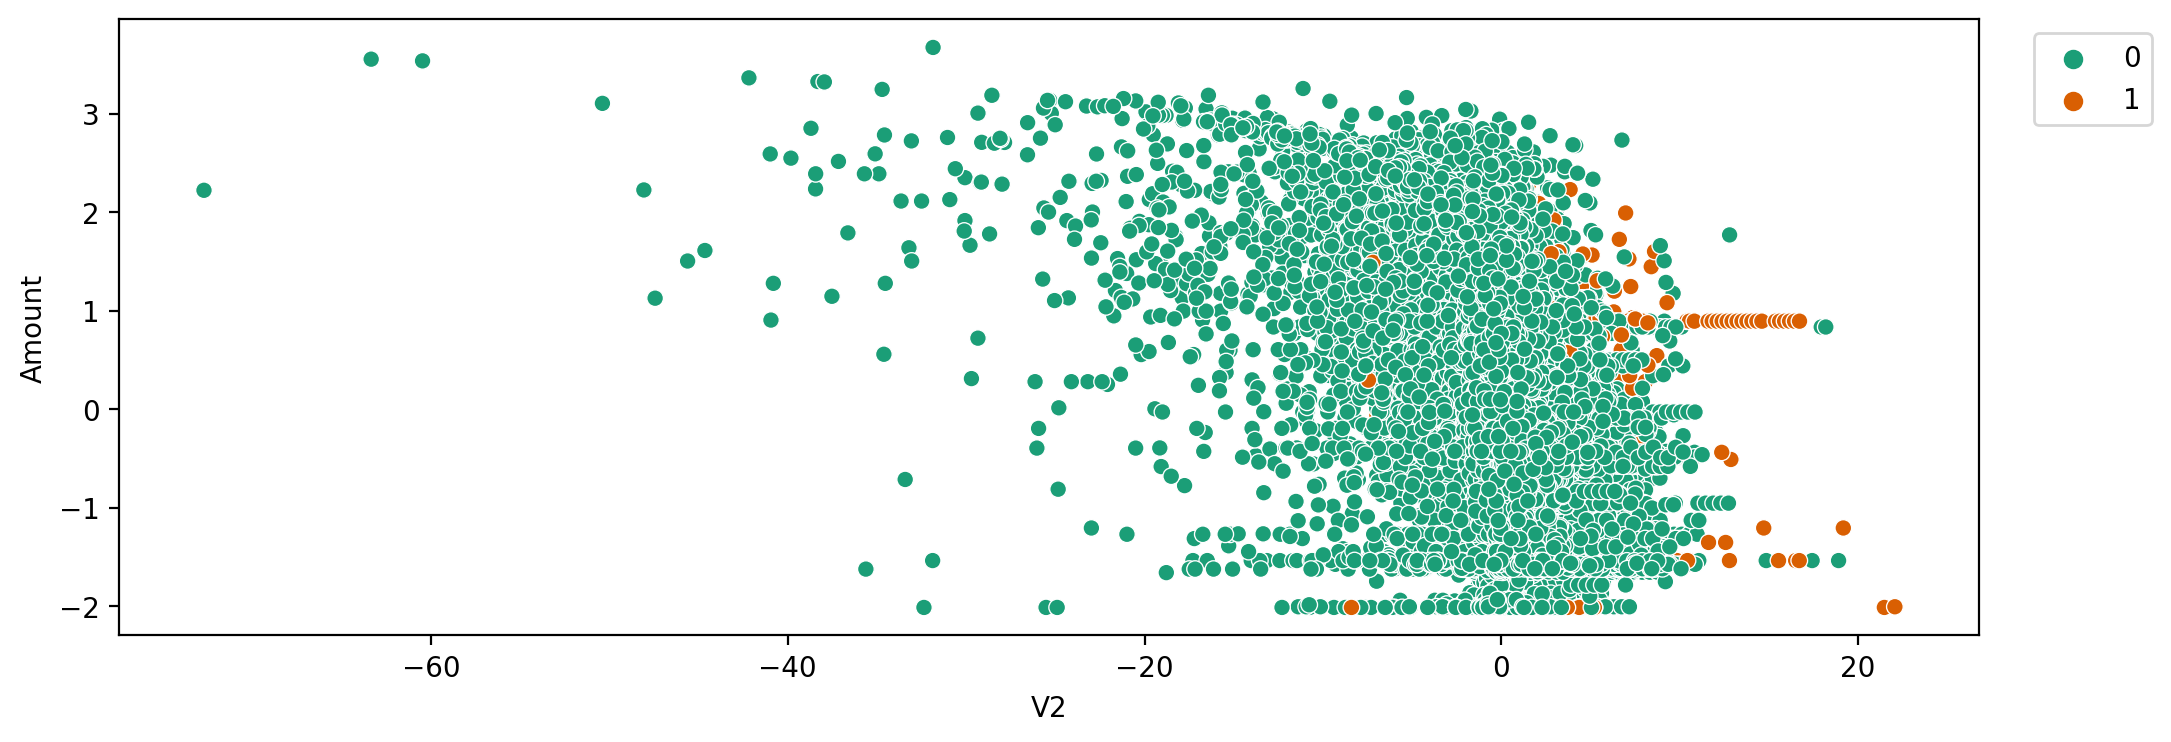

In [61]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(x='V2',y='Amount',data=credit_card,hue='Class', palette='Dark2')
plt.legend(bbox_to_anchor=(1.1,1));

**Feature Importances**

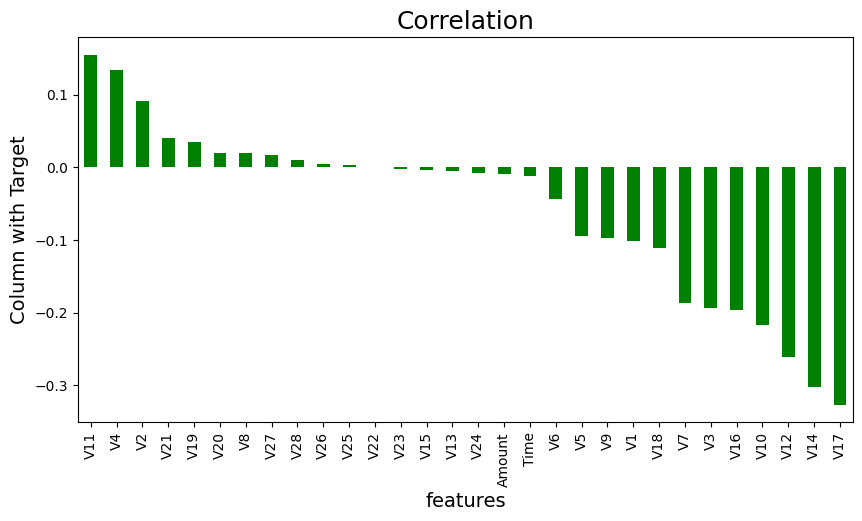

In [63]:
plt.figure(figsize=(10,5))
credit_card.corr()['Class'].sort_values(ascending=False).drop(['Class']).plot(kind='bar',color='g')
plt.xlabel('features',fontsize=14)
plt.ylabel('Column with Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show();

**Checking Skewness**

In [64]:
credit_card.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount     0.018354
Class     23.997579
dtype: float64

In [66]:
features = ['V8','V28','V23']
scaler = PowerTransformer(method='yeo-johnson')
#scaling the features
credit_card[features] = scaler.fit_transform(credit_card[features].values)
credit_card[features].head()

,V8,V28,V23
0,0.020305,-0.053332,-0.189647
1,0.006711,0.057491,0.153342
2,0.172348,-0.173752,1.501808
3,0.309141,0.201524,-0.317680
4,-0.331706,0.669838,-0.232990


In [67]:
credit_card.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8         2.297590
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -0.249209
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28        1.069192
Amount     0.018354
Class     23.997579
dtype: float64

**Splitting the Dataset**

In [68]:
x=credit_card.drop(columns=['Class'])
y=credit_card['Class']

[0.01579915 0.01188836 0.01413397 0.03317717 0.03657206 0.01414314
 0.01439687 0.02593826 0.01523186 0.0356559  0.07681567 0.07017666
 0.09127575 0.01161508 0.12768516 0.01291987 0.05261606 0.15668194
 0.03837101 0.01609382 0.0135074  0.01644579 0.01241735 0.00992411
 0.01203704 0.01035545 0.0151249  0.01159326 0.01118979 0.01621715]


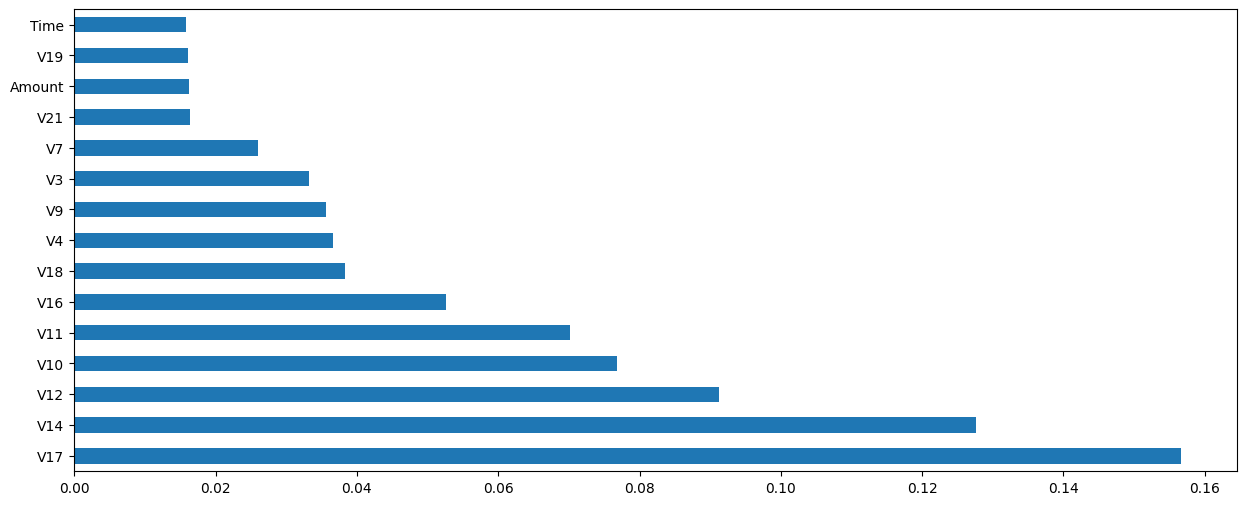

In [69]:
from sklearn.ensemble import ExtraTreesClassifier
selection=ExtraTreesClassifier()
selection.fit(x,y)
print(selection.feature_importances_)
plt.figure(figsize=(15,6))
feat_importances=pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show();

**Balancing the Imbalance Target**

In [70]:
from imblearn.over_sampling import SMOTE

In [75]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [77]:
smt = SMOTE()
x,y = smt.fit_resample(x,y)

In [79]:
y.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

## **MODEL BUILDING**

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc

In [82]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(40,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i,stratify=y)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred)*100)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

# LOGISTIC REGRESSION

max accuracy score corresponding to 49 is 97.66280358053567


cross validation score 96.36160596521464


Standard Deviation 1.4315533198397845


F1 score 97.12262769836832


Training accuracy 97.16885320858907


Test Accuracy 97.14840933471677


Confusion Matrix [[55751  1112]
 [ 2131 54732]]


Classification Report               precision    recall  f1-score   support

           0       0.96      0.98      0.97     56863
           1       0.98      0.96      0.97     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



Roc_auc Score 97.14840933471677





49

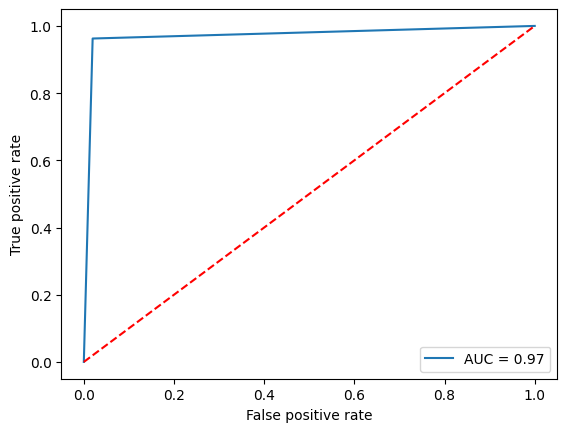

In [83]:
lr=LogisticRegression()
max_accuracy_score(lr,x,y)